<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Compare_view_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Function 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [4]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [6]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [7]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [8]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

# Create Loading the data Function

In [9]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

# Install Font TH-SARABUN

In [10]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [11]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Create Compute Distance Function

In [12]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

# Create Function Show Image

# เปรียบเทียบกระจกรถ

In [14]:
car1_dataset , car1_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/mirror/base')
dmg1_dataset , dmg1_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/mirror/dmg')

In [27]:
id1b = get_features(vgg,car1_loader)
id1v = get_features(vgg,dmg1_loader)

100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


In [29]:
id_mir = get_euclidean(id1b,id1v)
id_mir 

[23.09232521057129,
 21.460844039916992,
 12.544066429138184,
 25.223430633544922,
 22.75872039794922,
 14.932421684265137,
 11.871809005737305,
 21.483619689941406,
 5.219032287597656,
 15.96945571899414]

In [40]:
id1f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID1F.png')
id1_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID1_1.png')
id3f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID3F.png')
id3_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID3_1.png')

Text(200, 400, 'Distance = 25.223')

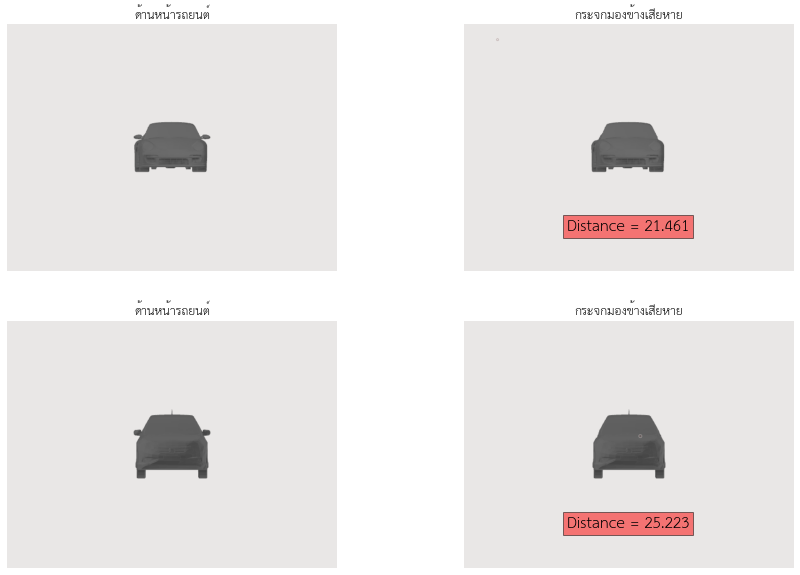

In [54]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id3f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id3_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

In [58]:
id5f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID5F.png')
id5_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID5_1.png')
id8f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID8F.png')
id8_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID8_1.png')

Text(200, 400, 'Distance = 5.219')

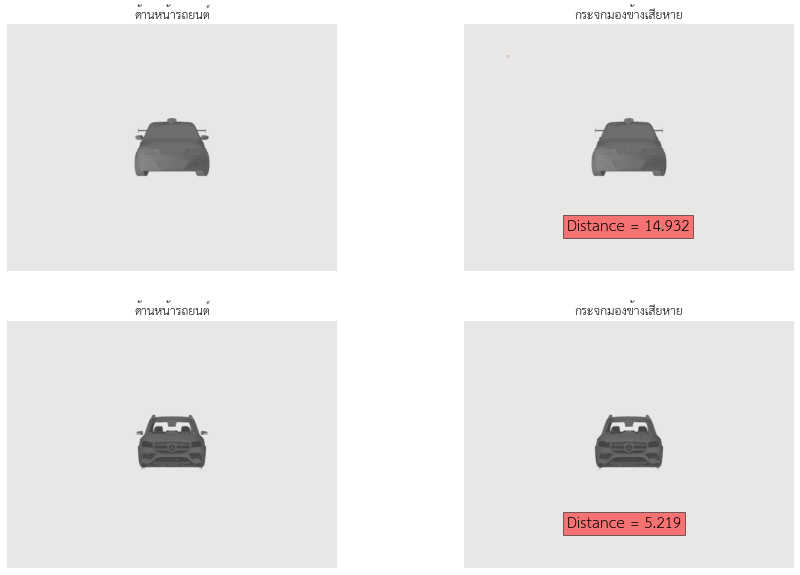

In [60]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id5f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id5_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[5],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id8f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id8_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[8],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))